In [3]:
import kagglehub as kh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
df = pd.read_csv('D:/Project/Normal-Data-Visulization/datasets/Student_Performance/archive/data.csv' , header=0)

In [5]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


## Eligible to give the exam Whos student has attendence greater than 75%.

In [6]:
df['Eligible'] = np.where(df['Attendance (%)'] > 75, 'Yes', 'No')

## Here now i make the Pie chart of Eligile Students.

In [7]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible
0,0.95822,3.4,8.2,53.0,47.0,No
1,0.85566,3.2,5.9,55.0,35.0,No
2,0.68025,3.2,9.3,41.0,32.0,No
3,0.25936,3.2,8.2,47.0,34.0,No
4,0.60447,3.8,10.0,75.0,33.0,No
...,...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0,No
1384,0.52466,4.9,6.5,63.0,37.0,No
1385,0.88197,3.9,6.2,54.0,36.0,No
1386,0.47336,3.5,7.3,61.0,34.0,No


In [8]:
df['Eligible'].value_counts()

Eligible
No     1277
Yes     111
Name: count, dtype: int64

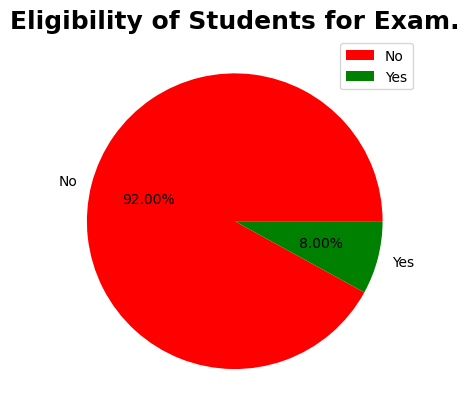

In [9]:
plt.pie(df['Eligible'].value_counts(), labels=['No', 'Yes'], autopct='%.2f%%' ,colors=['r' , 'g'])    #You can set any color

plt.title('Eligibility of Students for Exam.' , fontdict={'fontweight':'bold', 'fontsize': 18})
plt.legend()
plt.show()

## Here we add column Which shows Status of students Pass or Fail.

In [10]:
df['Status'] = np.where(df['Eligible'] == 'Yes' , 'Pass' , 'Fail')
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
0,0.95822,3.4,8.2,53.0,47.0,No,Fail
1,0.85566,3.2,5.9,55.0,35.0,No,Fail
2,0.68025,3.2,9.3,41.0,32.0,No,Fail
3,0.25936,3.2,8.2,47.0,34.0,No,Fail
4,0.60447,3.8,10.0,75.0,33.0,No,Fail
...,...,...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0,No,Fail
1384,0.52466,4.9,6.5,63.0,37.0,No,Fail
1385,0.88197,3.9,6.2,54.0,36.0,No,Fail
1386,0.47336,3.5,7.3,61.0,34.0,No,Fail


## Here we can see that Their is student who archive 91 grades because of low attendence Student has Directly Fail.

In [11]:
df[(df['Grades'] > 90) & (df['Grades'] < 100)]

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
556,0.99361,9.9,6.6,57.0,91.0,No,Fail


In [12]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
0,0.95822,3.4,8.2,53.0,47.0,No,Fail
1,0.85566,3.2,5.9,55.0,35.0,No,Fail
2,0.68025,3.2,9.3,41.0,32.0,No,Fail
3,0.25936,3.2,8.2,47.0,34.0,No,Fail
4,0.60447,3.8,10.0,75.0,33.0,No,Fail


Now we need the find A student whose attendance greater 75% and also pass.

In [13]:
condition_1 = df['Attendance (%)'] > 75
High_mark = df[condition_1].groupby(['Attendance (%)' , 'Status'])['Grades'].max().reset_index(name='Max Grades')
High_mark

,Attendance (%),Status,Max Grades
0,76.0,Pass,61.0
1,77.0,Pass,52.0
2,78.0,Pass,66.0
3,79.0,Pass,58.0
4,80.0,Pass,60.0
5,81.0,Pass,76.0
6,82.0,Pass,50.0
7,83.0,Pass,70.0
8,84.0,Pass,70.0
9,85.0,Pass,68.0


Here We return the Topper who is archive highest mark and also Pass.

In [14]:
High_mark[High_mark['Max Grades'] == High_mark['Max Grades'].max()]

,Attendance (%),Status,Max Grades
10,86.0,Pass,78.0


Here we see that a family whose Socioeconomic Score is high, their child tends to have lower performance.

In [15]:
df[df['Socioeconomic Score'] == df['Socioeconomic Score'].max()]

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
1336,0.99982,7.1,9.0,48.0,74.0,No,Fail


In [16]:
table = df[df['Status'] == 'Pass'].reset_index()

table[table['Socioeconomic Score'] == table['Socioeconomic Score'].min()]
# table[table['Socioeconomic Score'] == table['Socioeconomic Score'].max()]

,index,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
74,948,0.1077,3.8,9.5,87.0,33.0,Yes,Pass


Here we add the additional feature. 

In [17]:
df['Status'] = np.where((df['Grades'] < 35)&(df['Attendance (%)'] < 75), 'Fail', df['Status'])

df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
0,0.95822,3.4,8.2,53.0,47.0,No,Fail
1,0.85566,3.2,5.9,55.0,35.0,No,Fail
2,0.68025,3.2,9.3,41.0,32.0,No,Fail
3,0.25936,3.2,8.2,47.0,34.0,No,Fail
4,0.60447,3.8,10.0,75.0,33.0,No,Fail
...,...,...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0,No,Fail
1384,0.52466,4.9,6.5,63.0,37.0,No,Fail
1385,0.88197,3.9,6.2,54.0,36.0,No,Fail
1386,0.47336,3.5,7.3,61.0,34.0,No,Fail


What is the average grade in the dataset?

In [18]:
df['Grades'].sum() // df['Grades'].count()

np.float64(40.0)

How many students have an attendance percentage greater than 75%?

In [19]:
df[df['Attendance (%)'] > 75].count().sum()

np.int64(777)

What is the maximum number of study hours recorded?

In [20]:
df['Study Hours'].max()

np.float64(10.0)

Find the count of unique values in the "Socioeconomic Score" column.

In [21]:
len(df['Socioeconomic Score'].unique())

1376

Plot a histogram showing the distribution of grades using Matplotlib.

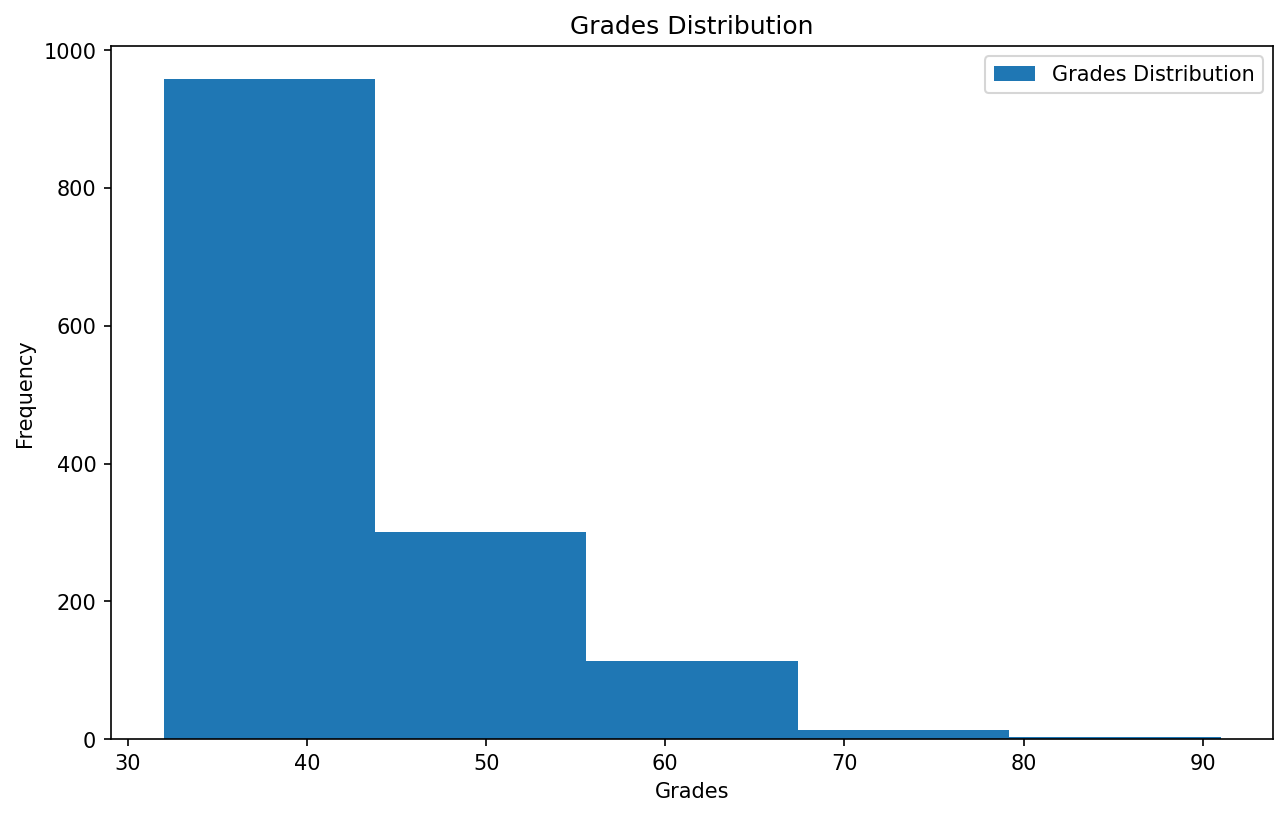

In [22]:
plt.figure(figsize=(10, 6) , dpi=150)
plt.hist(df['Grades'] , bins=5 , label='Grades Distribution')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Grades Distribution')
plt.legend()
plt.show()

What is the correlation between "Study Hours" and "Grades"? Use Pandas to calculate.

In [23]:
df['Study Hours'].corr(df['Grades'])

np.float64(0.8108066169441059)

Create a scatter plot to visualize the relationship between "Study Hours" and "Grades" using Seaborn.

<Axes: xlabel='Study Hours', ylabel='Grades'>

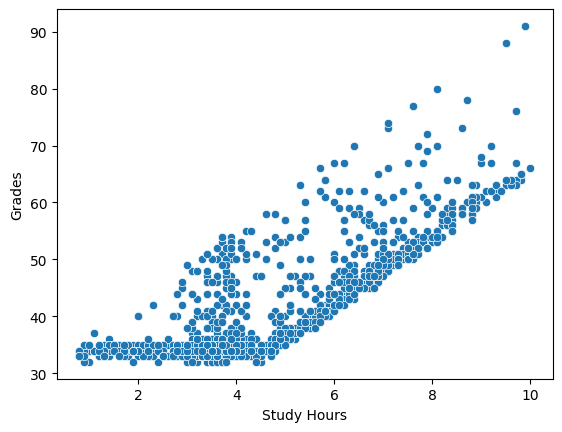

In [24]:
sns.scatterplot(x='Study Hours' , y='Grades' , data=df)

Group the data by "Attendance (%)" and calculate the average grades for each attendance level.

In [25]:
df.groupby('Attendance (%)')['Grades'].mean().reset_index(name='Average Grades')

,Attendance (%),Average Grades
0,40.0,38.750000
1,41.0,39.035714
2,42.0,35.828571
3,43.0,34.625000
4,44.0,36.464286
5,45.0,39.395349
6,46.0,38.600000
7,47.0,38.625000
8,48.0,40.900000
9,49.0,38.857143


Find the standard deviation of "Sleep Hours".

In [26]:
df['Sleep Hours'].std()

np.float64(1.370699566294343)

Using a boxplot in Seaborn, visualize the distribution of "Sleep Hours".

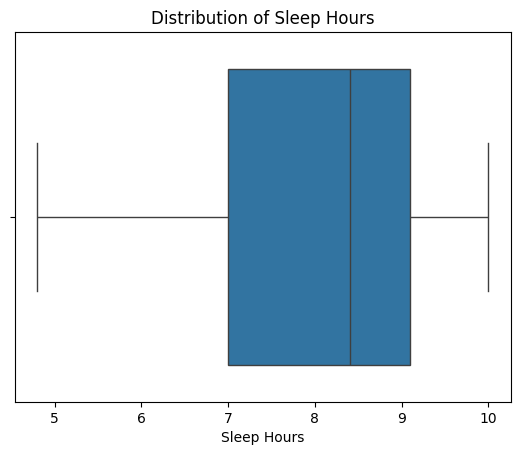

In [27]:
sns.boxplot(x=df['Sleep Hours'])
plt.title('Distribution of Sleep Hours')
plt.show()

Use a line plot to visualize the trend of "Grades" across increasing "Attendance (%)" levels.

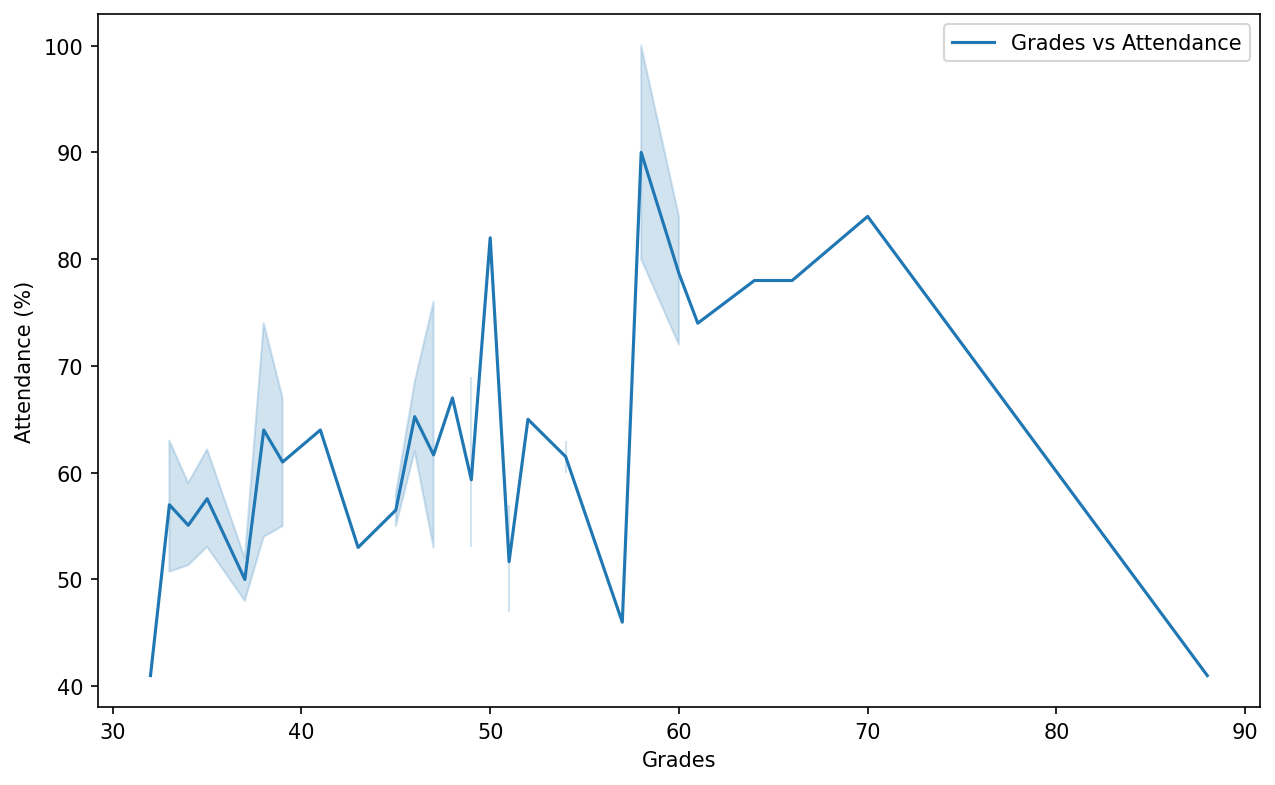

In [28]:
plt.figure(figsize=(10, 6) , dpi=150)
# plt.plot(df['Grades'][:100])
# plt.plot(df['Attendance (%)'][:100])

sns.lineplot(x=df['Grades'][:100] , y=df['Attendance (%)'][:100] , label='Grades vs Attendance')
plt.legend()

Build a new column, "Performance Category", categorizing grades into three bins: low, medium, high. Visualize their counts using Seaborn.

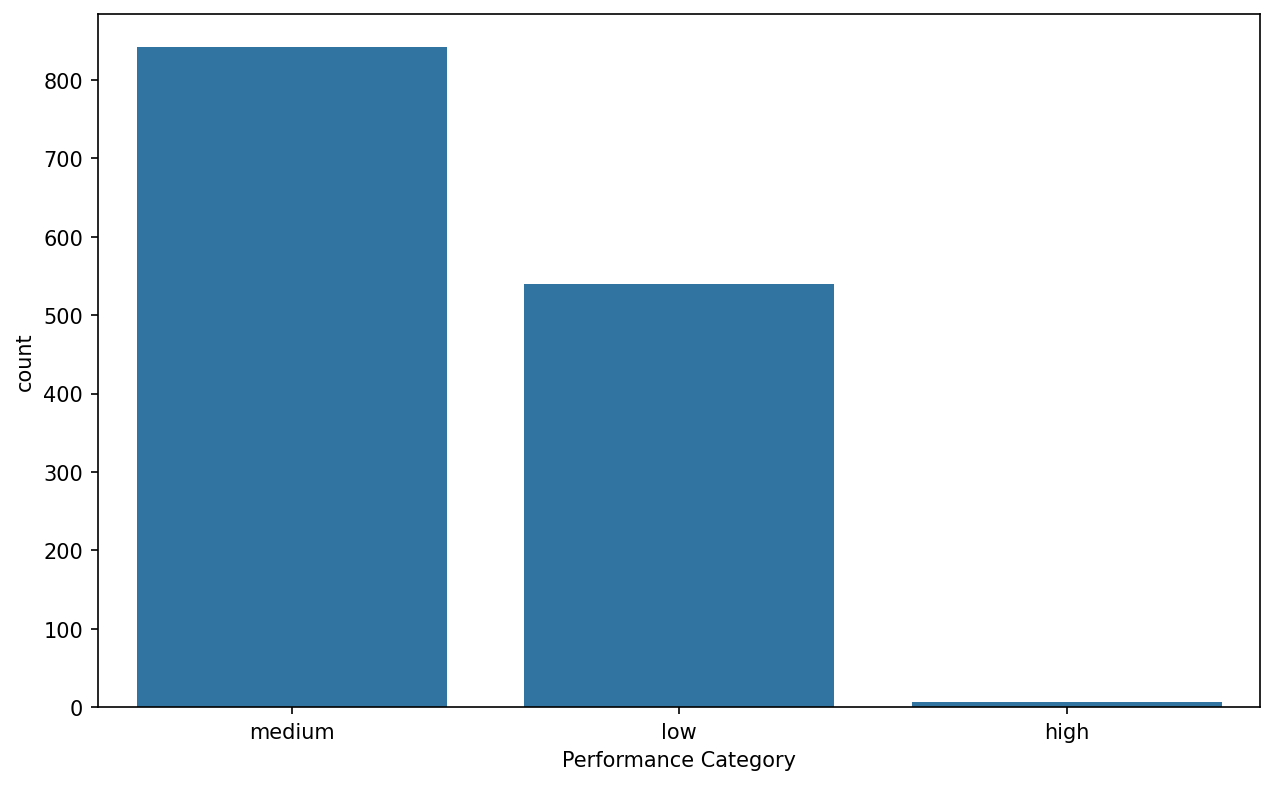

In [29]:
df['Performance Category'] = np.where(df['Grades'] > 75, 'high', 'medium')
df['Performance Category'] = np.where(df['Grades'] < 35, 'low' , df['Performance Category'])

plt.figure(figsize=(10, 6) , dpi=150)
sns.countplot(x='Performance Category' , data=df)
plt.show()

Perform a regression analysis to predict "Grades" based on "Study Hours" and "Attendance (%)" using NumPy or Pandas.

Use a pairplot in Seaborn to examine pairwise relationships between all numerical variables.

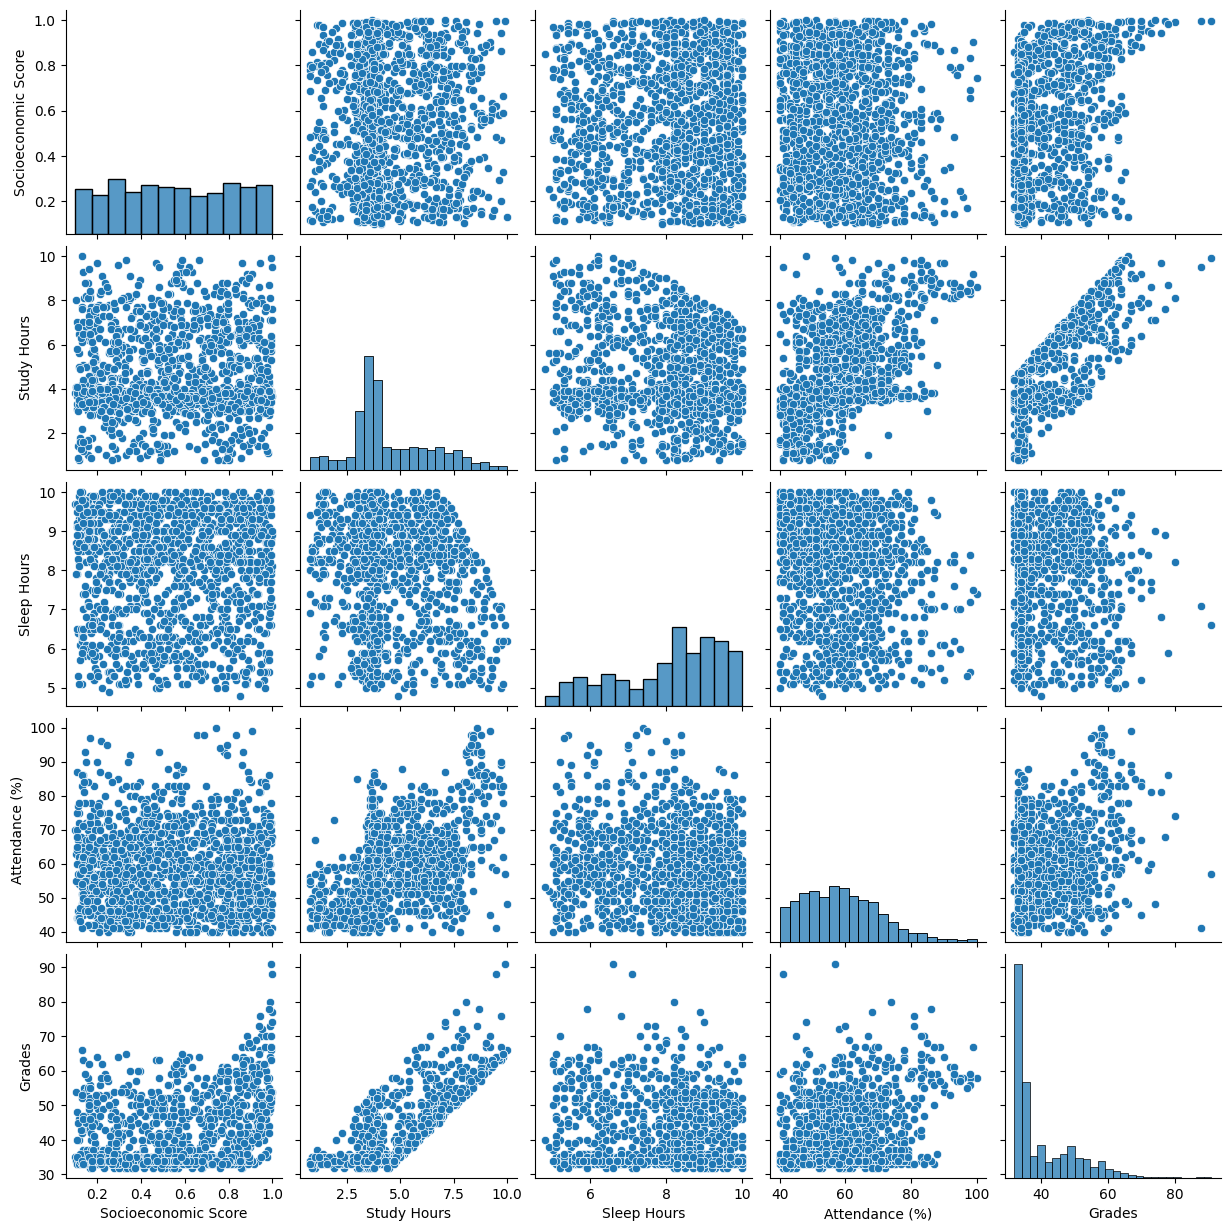

In [30]:
sns.pairplot(df)
plt.show()

Write a function to detect outliers in the dataset using the IQR method and list the outliers for "Grades".

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

In [34]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status,Performance Category
0,0.95822,3.4,8.2,53.0,47.0,No,Fail,medium
1,0.85566,3.2,5.9,55.0,35.0,No,Fail,medium
2,0.68025,3.2,9.3,41.0,32.0,No,Fail,low
3,0.25936,3.2,8.2,47.0,34.0,No,Fail,low
4,0.60447,3.8,10.0,75.0,33.0,No,Fail,low


D:\Temp\ipykernel_18568\2926207962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Socioeconomic Score'])


<Axes: xlabel='Socioeconomic Score', ylabel='Density'>

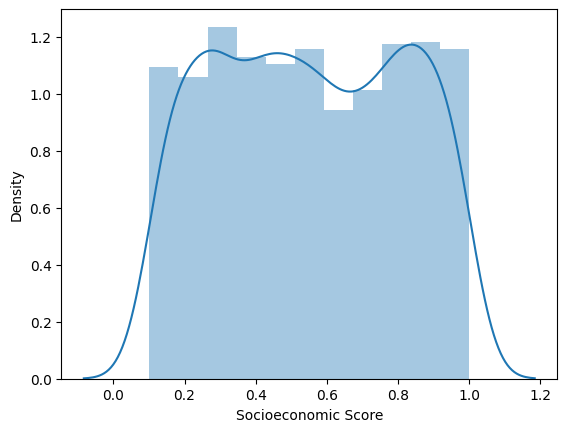

In [40]:
sns.distplot(df['Socioeconomic Score'])

In [84]:
df['Status'].sample(5)

228    Fail
19     Fail
460    Fail
260    Fail
414    Fail
Name: Status, dtype: object